$ \text {Functions from previous lecturs} $

In [ ]:
from random import Random
from math import ceil, sqrt
from matplotlib.pyplot import figure
SEED = 5

def generate_num(N=1000):
  random_num = Random(x=SEED)
  return(
      [random_num.uniform(a=0,b=1)
      for _ in range(N)],
      [random_num.uniform(a=0,b=1)
      for _ in range(N)]
  )

def loss(x_p, y_p, batch_x ,batch_y):
  return (1/len(batch_x))* sum([sqrt((x_i-x_p)**2+(y_i-y_p)**2) for x_i , y_i in zip(batch_x, batch_y)])
  
'''
This code defines a function calc_grad that calculates the gradients of the loss function with respect to x and y given the current point (x_p, y_p) and a batch of data points batch_x and batch_y.

The function initializes sum_x and sum_y to 0, and n to be the length of batch_x. Then, it enters a loop that iterates over each point (x_i, y_i) in the batch.

For each point, it calculates the inverse square root of the Euclidean distance between the current point (x_p, y_p) and the point (x_i, y_i). 
It uses this value to update sum_x and sum_y by adding the product of the inverse square root and the difference in x and y values.

After the loop completes, the function returns the negative average of sum_x and sum_y. 
Note that the negative sign is added to obtain the negative gradient, as gradient descent requires the negative gradient to move towards the minimum of the function. 
The average is calculated by dividing sum_x and sum_y by n.
'''
def calc_grad(x_p, y_p, batch_x ,batch_y):
  sum_x, sum_y = 0, 0
  n = len(batch_x)
  for x_i, y_i in zip(batch_x ,batch_y):
    inv_sqrt = ((x_i - x_p) ** 2 + (y_i - y_p) ** 2) ** (-0.5)
    sum_x += inv_sqrt * (x_i - x_p)
    sum_y += inv_sqrt * (y_i - y_p)
  return -sum_x/n, -sum_y/n

data_x, data_y = generate_num()

print(data_x[:10])
print(data_y[:10])

# Training data with SGD

In [ ]:
EPOCHS = 100
INDICIS = [i for i in range(len(data_x))]
BATCH_SZ = 4
N = len(data_x)
NUM_BATCH =   ceil (N/BATCH_SZ)
Sampler = Random(x=SEED)
x_p_sgd , y_p_sgd = 0.3 , 0.3  # a dummy variable that can be any thing 
DELTA = 1e-2
losses_sgd = []

for _ in range(EPOCHS):
  Sampler.shuffle(INDICIS)
  """
  first loop ---> BATCH_IND =0 , batch indices = INDICIS[0:10] = [487, 511, 30, 142, 936, 929, 361, 565, 683, 533]
  && batch_x[:3] = [0.701248150219702, 0.9352531319430322, 0.28636108076866396] ----> a shuffled list of size 10 "mini batch" from random data generated
  Note "INDICIS" is a shuffled list from 0:999
  """
  for BATCH_IND in range(NUM_BATCH):
    batch_indices = INDICIS[BATCH_SZ * BATCH_IND : BATCH_SZ * (BATCH_IND+1) ]
    batch_x = [data_x[i] for i in batch_indices]
    batch_y = [data_y[i] for i in batch_indices]
# calculate gradient upoun my batches 
    grad_x_sgd , grad_y_sgd = calc_grad(x_p_sgd , y_p_sgd, batch_x ,batch_y) 
# update variable to converge
    x_p_sgd -= DELTA * grad_x_sgd
    y_p_sgd -= DELTA * grad_y_sgd
    losses_sgd.append(loss(x_p_sgd , y_p_sgd , data_x , data_y))

# Training data with GD

In [ ]:
EPOCHS = 100
N = len(data_x)
x_p_gd , y_p_gd = 0.3 , 0.3  # a dummy variable that can be any thing 
DELTA = 1e-2
losses_gd = []

for _ in range(EPOCHS):
  # calculate gradient upoun my batches 
    grad_x_gd , grad_y_gd = calc_grad(x_p_gd , y_p_gd, data_x ,data_y) 
# update variable to converge
    x_p_gd -= DELTA * grad_x_gd
    y_p_gd -= DELTA * grad_y_gd
    losses_gd.append(loss(x_p_gd , y_p_gd , data_x , data_y))

# Visualizing loss curves

Text(0, 0.5, 'Losses')

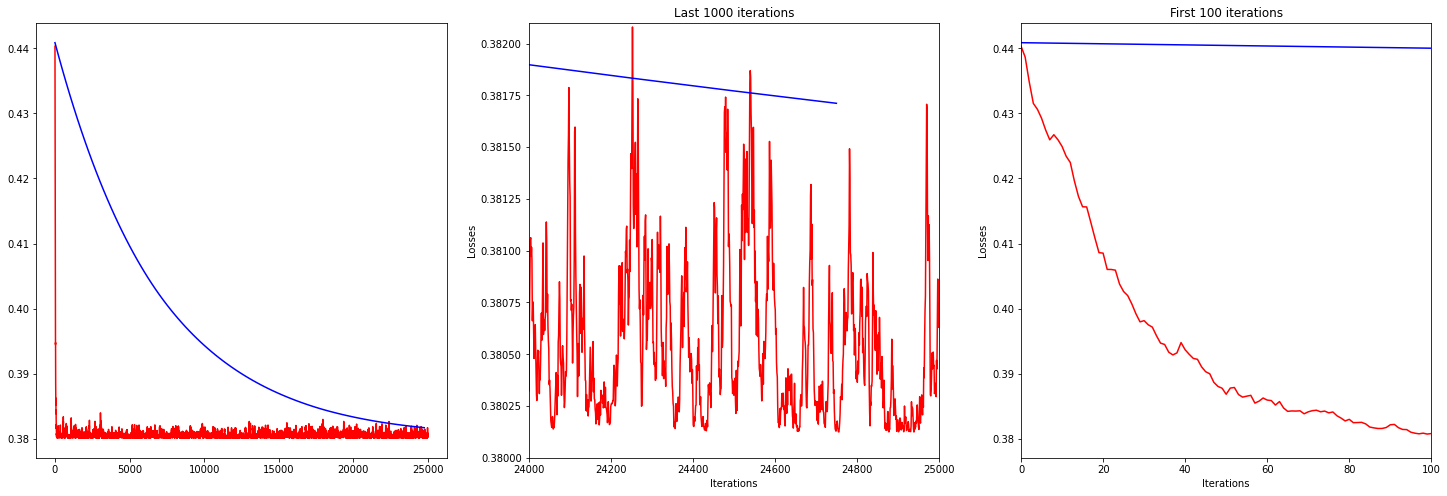

In [ ]:
fig = figure(figsize=[25,8])
(ax1, ax2, ax3) = fig.subplots(1, 3)


ax1.plot(losses_sgd , "r")
ax1.plot([i*NUM_BATCH for i in range(len(losses_gd))],losses_gd , "b")

# Let's focus on the last 1000 iterations
ax2.plot(losses_sgd , "r")
ax2.plot([i*NUM_BATCH for i in range(len(losses_gd))],losses_gd , "b")
ax2.set_xlim(24000, 25000)
# Dr Meena made the y-limits from 0.38 to 0.4, but I found
# that from 0.38 to 0.3821 visualizes it much better
ax2.set_ylim(0.38, 0.3821)
ax2.title.set_text("Last 1000 iterations")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Losses")

# Let's focus on the FIRST 100 iterations
ax3.plot(losses_sgd , "r")
ax3.plot([i*NUM_BATCH for i in range(len(losses_gd))],losses_gd , "b")
ax3.set_xlim(0, 100)
ax3.title.set_text("First 100 iterations")
ax3.set_xlabel("Iterations")
ax3.set_ylabel("Losses")